<a href="https://colab.research.google.com/github/vandien201462C/BTtuan4/blob/main/Ai_Exercise_Fuzzy_10_1016_j.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy   # thư viện fuzzy logic  ( logic mờ )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=eab9c7d9253f2d28386b957cf2d500e0e381d3c513e973131f105e227f8d7f59
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


2.317428439519853


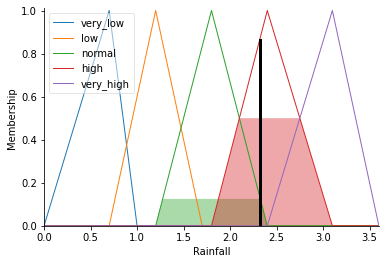

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind_speed = ctrl.Antecedent(np.arange(0.8,2.15,0.05),'Wind_speed') #đầu vào
temp = ctrl.Antecedent(np.arange(-5,41,1),'Temp')  #đầu vào
rainfall = ctrl.Consequent(np.arange(0,3.7,0.1),'Rainfall')  #đầu ra

# Wind_speed 0 - 2.1   
wind_speed['very_low'] = fuzz.trimf(wind_speed.universe,[0.8,0.9,1.1])
wind_speed['low'] = fuzz.trimf(wind_speed.universe,[0.9,1.1,1.3])  
wind_speed['normal'] = fuzz.trimf(wind_speed.universe,[1.15,1.35,1.55])  
wind_speed['high'] = fuzz.trimf(wind_speed.universe,[1.35,1.5,1.8])  
wind_speed['very_high'] = fuzz.trimf(wind_speed.universe,[1.55,1.85,2.1])   

# Temp -5 - 40 *C   
temp['very_low'] = fuzz.trimf(temp.universe,[-5,-1,3])
temp['low'] = fuzz.trimf(temp.universe,[-1,5,12])  
temp['normal'] = fuzz.trimf(temp.universe,[5,13,21])  
temp['high'] = fuzz.trimf(temp.universe,[13,23,31])  
temp['very_high'] = fuzz.trimf(temp.universe,[23,31,40])

# Rainfall  0 - 3.6   0 0.7 1 1.2 1.7 1.8 2.4 3.1 3.6
rainfall['very_low'] = fuzz.trimf(rainfall.universe,[0,0.7,1])
rainfall['low'] = fuzz.trimf(rainfall.universe,[0.7,1.2,1.7])  
rainfall['normal'] = fuzz.trimf(rainfall.universe,[1.2,1.8,2.4])  
rainfall['high'] = fuzz.trimf(rainfall.universe,[1.8,2.4,3.1])  
rainfall['very_high'] = fuzz.trimf(rainfall.universe,[2.4,3.1,3.6])

#wind_speed.view()
#temp.view()
#rainfall.view()

#Khai báo Rule
rule1=ctrl.Rule(wind_speed['very_low'] & temp['very_low'], rainfall['very_low'])#
rule2=ctrl.Rule(wind_speed['very_low'] & temp['low'], rainfall['very_low'])
rule3=ctrl.Rule(wind_speed['very_low'] & temp['normal'], rainfall['low'])
rule4=ctrl.Rule(wind_speed['very_low'] & temp['high'], rainfall['normal'])
rule5=ctrl.Rule(wind_speed['very_low'] & temp['very_high'], rainfall['high'])

rule6=ctrl.Rule(wind_speed['low'] & temp['very_low'], rainfall['very_low'])  #
rule7=ctrl.Rule(wind_speed['low'] & temp['low'], rainfall['low'])#
rule8=ctrl.Rule(wind_speed['low'] & temp['normal'], rainfall['normal'])
rule9=ctrl.Rule(wind_speed['low'] & temp['high'], rainfall['normal'])
rule10=ctrl.Rule(wind_speed['low'] & temp['very_high'], rainfall['high'])

rule11=ctrl.Rule(wind_speed['normal'] & temp['very_low'], rainfall['low'])
rule12=ctrl.Rule(wind_speed['normal'] & temp['low'], rainfall['normal'])
rule13=ctrl.Rule(wind_speed['normal'] & temp['normal'], rainfall['normal'])
rule14=ctrl.Rule(wind_speed['normal'] & temp['high'], rainfall['high'])
rule15=ctrl.Rule(wind_speed['normal'] & temp['very_high'], rainfall['high'])

rule16=ctrl.Rule(wind_speed['high'] & temp['very_low'], rainfall['normal'])
rule17=ctrl.Rule(wind_speed['high'] & temp['low'], rainfall['normal'])
rule18=ctrl.Rule(wind_speed['high'] & temp['normal'], rainfall['high'])
rule19=ctrl.Rule(wind_speed['high'] & temp['high'], rainfall['high'])
rule20=ctrl.Rule(wind_speed['high'] & temp['very_high'], rainfall['high'])

rule21=ctrl.Rule(wind_speed['very_high'] & temp['very_low'], rainfall['normal'])
rule22=ctrl.Rule(wind_speed['very_high'] & temp['low'], rainfall['high'])
rule23=ctrl.Rule(wind_speed['very_high'] & temp['normal'], rainfall['high'])
rule24=ctrl.Rule(wind_speed['very_high'] & temp['high'], rainfall['high'])
rule25=ctrl.Rule(wind_speed['very_high'] & temp['very_high'], rainfall['very_high'])#

raining_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                  rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                                  rule20, rule21, rule22, rule23, rule24, rule25])
raining = ctrl.ControlSystemSimulation(raining_ctrl)
raining.input['Wind_speed'] = 1   
raining.input['Temp'] = 30   
raining.compute()
print(raining.output['Rainfall'])
rainfall.view(sim = raining)
